# Preliminar analysis eye data 
- Eye data automatically collected through Varjo interface. 
- Participant followed a Nikolaus house shaped image displayed on the VR environment

## Load data

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
df = pd.read_csv("C:/Users/experiment/Desktop/Nikolaus_heatmap_data/left_eye_only/varjo_gaze_output_2025-04-30_14-14-41-647.csv")

In [35]:
# Gültige Daten: NaNs entfernen
df = df.dropna(subset=[
    "gaze_projected_to_left_view_x", "gaze_projected_to_right_view_x",
    "gaze_projected_to_left_view_y", "gaze_projected_to_right_view_y"
])

df["gaze_projected_to_left_view_y"] = pd.to_numeric(df["gaze_projected_to_left_view_y"], errors="coerce")
df["gaze_projected_to_right_view_y"] = pd.to_numeric(df["gaze_projected_to_right_view_y"], errors="coerce")

# Kombinierte (gemittelte) Gaze-Position berechnen
df["gaze_x_avg"] = (df["gaze_projected_to_left_view_x"] + df["gaze_projected_to_right_view_x"]) / 2
df["gaze_y_avg"] = (df["gaze_projected_to_left_view_y"] + df["gaze_projected_to_right_view_y"]) / 2


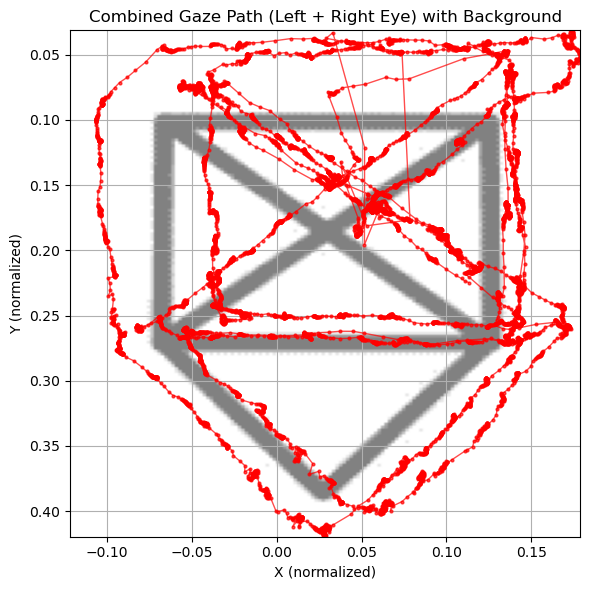

In [36]:
import matplotlib.image as mpimg  # Import for loading images

# Load the image
background_image_path = "C:/Users/experiment/Desktop/Nikolaus_heatmap_data/nikolaus.png"
background_image = mpimg.imread(background_image_path)

# Determine the limits of the gaze data
x_min, x_max = df["gaze_x_avg"].min() - 0.015, df["gaze_x_avg"].max() 
y_min, y_max = df["gaze_y_avg"].min(), df["gaze_y_avg"].max()

# Plot with the image as background
plt.figure(figsize=(6, 6))

# Display the image with dynamic extent
plt.imshow(background_image, extent=[x_min, x_max, y_min, y_max], aspect='auto', alpha=0.5)

# Overlay the gaze path
plt.plot(df["gaze_x_avg"], df["gaze_y_avg"], marker='o', markersize=2, linewidth=1, alpha=0.7, color='red')

# Add titles and labels
plt.title("Combined Gaze Path (Left + Right Eye) with Background")
plt.xlabel("X (normalized)")
plt.ylabel("Y (normalized)")

# Invert Y-axis to match screen coordinates
plt.gca().invert_yaxis()

# Add grid and layout adjustments
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()